<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [29]:
# !pip install js

In [8]:
# import piplite
# await piplite.install(['numpy'])
# await piplite.install(['pandas'])
# await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [188]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

This function is to plot the confusion matrix.


In [12]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [16]:
# from js import fetch
# import io

# URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# resp1 = await fetch(URL1)
# text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
# data = pd.read_csv(text1)

In [17]:
data = pd.read_csv('dataset_part_2.csv')

In [18]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [19]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
# resp2 = await fetch(URL2)
# text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
features = pd.read_csv(URL2)

In [20]:
features.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [21]:
data['Class'].value_counts()

Class
1    60
0    30
Name: count, dtype: int64

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [30]:
y = data['Class'].to_numpy()
y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [34]:
# students get this 
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(features)
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

we can see we only have 18 test samples.


In [43]:
y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [47]:
parameters ={'C':[0.01,0.1,1,10],
             'penalty':['l2'],
             'solver':['lbfgs']}
logR = LogisticRegression()

In [49]:
logreg_cv = GridSearchCV(estimator=logR, param_grid=parameters, cv=10, scoring='accuracy')
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [51]:
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.85


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [56]:
print(f'Testing data acuuracy using (best parameters): {logreg_cv.score(X_test, y_test):.4f}')

Testing data acuuracy using (best parameters): 0.8333


In [58]:
yhat_lg = logreg_cv.predict(X_test)
print(classification_report(y_test, yhat_lg))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



Lets look at the confusion matrix:


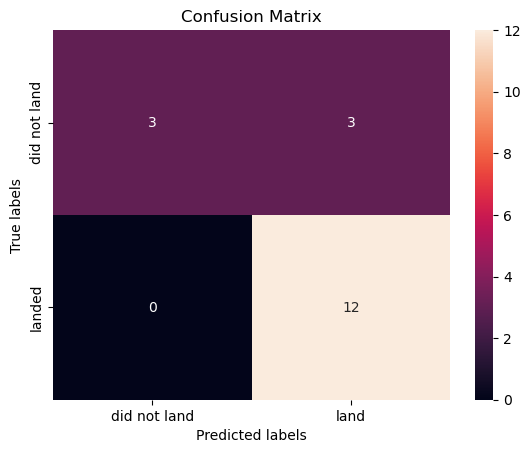

In [61]:
plot_confusion_matrix(y_test, yhat_lg)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [66]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [67]:
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10, scoring='accuracy')
svm_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy')

In [68]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8642857142857144


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [74]:
print(f'Testing data accuracy using (best parameters): {svm_cv.score(X_test, y_test):.4f}')

Testing data accuracy using (best parameters): 0.8333


In [76]:
yhat_svm = svm_cv.predict(X_test)
print(classification_report(y_test, yhat_svm))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



We can plot the confusion matrix


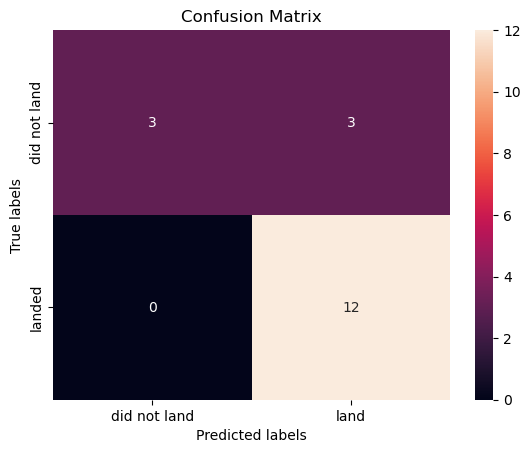

In [79]:
plot_confusion_matrix(y_test, yhat_svm)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [95]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': [None, 'sqrt', 'log2'],  # Corrected from 'auto' to None
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

tree = DecisionTreeClassifier()

In [97]:
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10, scoring='accuracy')
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [98]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.9178571428571429


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [101]:
print(f'Testing data accuracy using (best parameters): {tree_cv.score(X_test, y_test):.4f}')

Testing data accuracy using (best parameters): 0.7778


In [102]:
yhat_tree = tree_cv.predict(X_test) 
print(classification_report(y_test, yhat_tree))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.75      1.00      0.86        12

    accuracy                           0.78        18
   macro avg       0.88      0.67      0.68        18
weighted avg       0.83      0.78      0.74        18



We can plot the confusion matrix


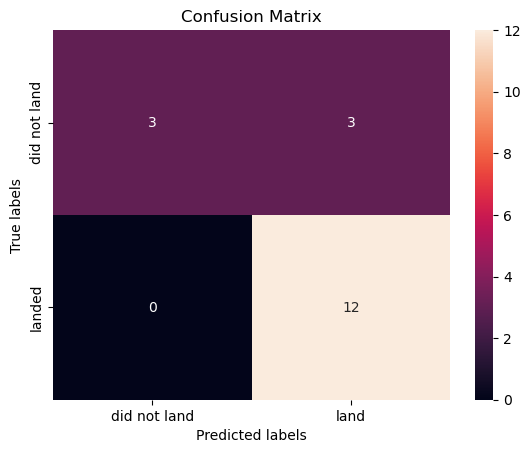

In [123]:
plot_confusion_matrix(y_test, yhat_tree)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [108]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [110]:
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10, scoring='accuracy')
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='accuracy')

In [123]:
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
accuracy : 0.8642857142857142


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [114]:
print(f'Testing data accuracy using (best parameters): {knn_cv.score(X_test, y_test):.4f}')

Testing data accuracy using (best parameters): 0.7778


In [115]:
yhat_knn = knn_cv.predict(X_test)
print(classification_report(y_test, yhat_knn))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.83      0.83      0.83        12

    accuracy                           0.78        18
   macro avg       0.75      0.75      0.75        18
weighted avg       0.78      0.78      0.78        18



We can plot the confusion matrix


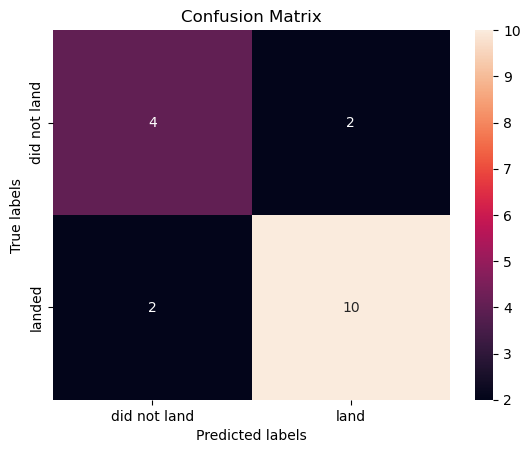

In [117]:
plot_confusion_matrix(y_test, yhat_knn)

## Visual Evaluation of Independent Model Testing

In [165]:
# Create dictionary of observed and predicted vaules for test set and convert to dataframe
true_test_dict = {'Range':pd.Series(range(18)),
                 'Observed_Target':pd.Series(y_test),
                 'Predicted_LG':pd.Series(yhat_lg),
                 'Predicted_SVM':pd.Series(yhat_svm),
                 'Predicted_DT':pd.Series(yhat_tree),
                 'Predicted_KNN':pd.Series(yhat_knn)
                }
df = pd.DataFrame(true_test_dict)

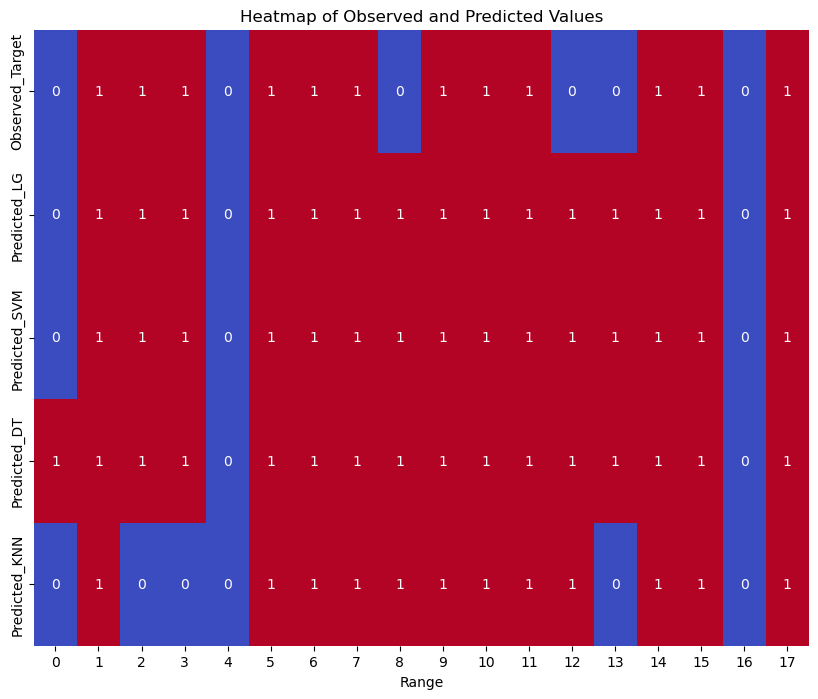

In [200]:
# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.set_index('Range').T, annot=True, cmap='coolwarm', cbar=False)
plt.title('Heatmap of Observed and Predicted Values')
plt.savefig('Capstone/Lab 8/heatmap.png')
plt.show()

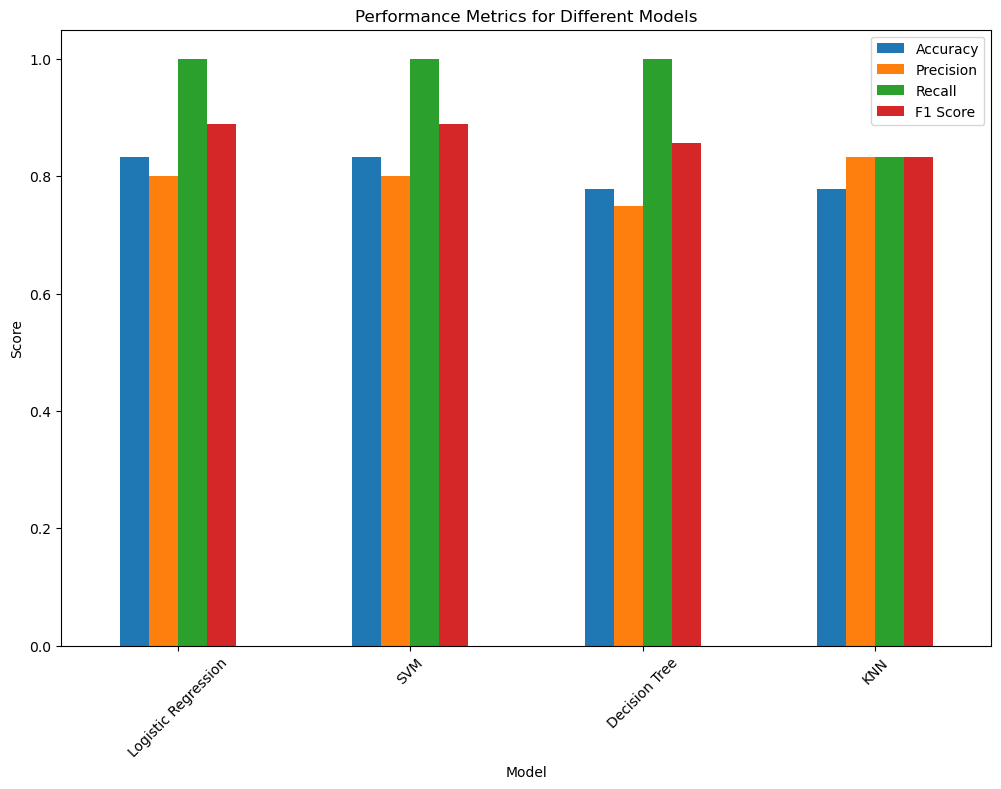

In [202]:
# Calculate performance metrics for each model
metrics = {
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'],
    'Accuracy': [
        accuracy_score(df['Observed_Target'], df['Predicted_LG']),
        accuracy_score(df['Observed_Target'], df['Predicted_SVM']),
        accuracy_score(df['Observed_Target'], df['Predicted_DT']),
        accuracy_score(df['Observed_Target'], df['Predicted_KNN'])
    ],
    'Precision': [
        precision_score(df['Observed_Target'], df['Predicted_LG']),
        precision_score(df['Observed_Target'], df['Predicted_SVM']),
        precision_score(df['Observed_Target'], df['Predicted_DT']),
        precision_score(df['Observed_Target'], df['Predicted_KNN'])
    ],
    'Recall': [
        recall_score(df['Observed_Target'], df['Predicted_LG']),
        recall_score(df['Observed_Target'], df['Predicted_SVM']),
        recall_score(df['Observed_Target'], df['Predicted_DT']),
        recall_score(df['Observed_Target'], df['Predicted_KNN'])
    ],
    'F1 Score': [
        f1_score(df['Observed_Target'], df['Predicted_LG']),
        f1_score(df['Observed_Target'], df['Predicted_SVM']),
        f1_score(df['Observed_Target'], df['Predicted_DT']),
        f1_score(df['Observed_Target'], df['Predicted_KNN'])
    ]
}

metrics_df = pd.DataFrame(metrics)

# Plot bar chart
metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Performance Metrics for Different Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('Capstone/Lab 8/barchart.png')
plt.show()

## TASK  12


Find which method performs best:


In [208]:
# Define models and parameters
models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [2 * n for n in range(1, 10)],
            'min_samples_split': [2, 5, 10],
            'max_features': [None, 'sqrt', 'log2'],
            'min_samples_leaf': [1, 2, 4],
            'splitter': ['best', 'random']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'p': [1, 2],
        }
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {
            'kernel': ('rbf', 'poly', 'sigmoid'),
            'gamma': np.logspace(-3, 3, 5),
            'C': np.logspace(-3, 3, 5),
            'degree': [1, 2, 3, 4]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
           'C': [0.01, 0.1, 1, 10],
           'penalty': ['l2'],
           'solver': ['lbfgs']
        }
    }
}

# Grid search over all models and parameters
results = []
Testing = []
for model_name, model_details in models.items():
    clf = GridSearchCV(model_details['model'], model_details['params'], cv=10, scoring='f1', refit='f1') # Using F-1 for model evaluation
    clf.fit(X_train, y_train)
    best_model = clf.best_estimator_
    
    # Compute Accuracy for best estimator
    yhat = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, yhat)
    
    # Compute ROC-AUC for the best estimator
    y_prob = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    roc_auc = roc_auc_score(y_test, y_prob)
    
    results.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
    })
    Testing.append({
        'estimator': best_model,
        'test_score_f1': clf.score(X_test, y_test),
        'test_score_accuracy': accuracy,
        'roc_auc': roc_auc
    })

# Output best results
print("Best Training Results:")
print("-" * 50)
for result in results:
    print(f"Model: {result['model']}")
    print(f"  Best F-1 Score: {result['best_score']:.4f}")
    print(f"  Best Params: {result['best_params']}")
    print()

# Output testing scores
print("Testing Scores for Best Estimators:")
print("-" * 50)
for test in Testing:
    print(f"Best Estimator: {test['estimator']}")
    print(f"  F-1 Test Score: {test['test_score_f1']:.4f}")
    print(f"  Accuracy Test Score: {test['test_score_accuracy']:.4f}")
    print(f"  ROC-AUC Score: {test['roc_auc']:.4f}")
    print()


Best Training Results:
--------------------------------------------------
Model: DecisionTree
  Best F-1 Score: 0.9323
  Best Params: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}

Model: KNN
  Best F-1 Score: 0.9064
  Best Params: {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}

Model: SVM
  Best F-1 Score: 0.9002
  Best Params: {'C': 1.0, 'degree': 1, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}

Model: LogisticRegression
  Best F-1 Score: 0.8978
  Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

Testing Scores for Best Estimators:
--------------------------------------------------
Best Estimator: DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_split=5)
  F-1 Test Score: 0.8000
  Accuracy Test Score: 0.7222
  ROC-AUC Score: 0.6597

Best Estimator: KNeighborsClassifier(n_neighbors=4, p=1)
  F-1 Test Score: 0.8333
  Accuracy Test Score: 0.7778
  ROC-AUC Score: 0.72

## Model Selection: Support Vector Machine
* The drop in F1 scoring between training and testing for models Decision Tree and KNN suggest the overfitting of training data.
* KNN, SVM, and Logistic Regression are all strong contenders with scoring for test data.
* There is virtually no drop in scoring between training and testing for SVM and Logistic Regression
* However, given the higher ROC-AUC score SVM appears to be the best model 

In [211]:
yhat_best_svm = Testing[2]['estimator'].predict(X_test)
# Classification report for best SVM model
print(classification_report(y_test, yhat_best_svm))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



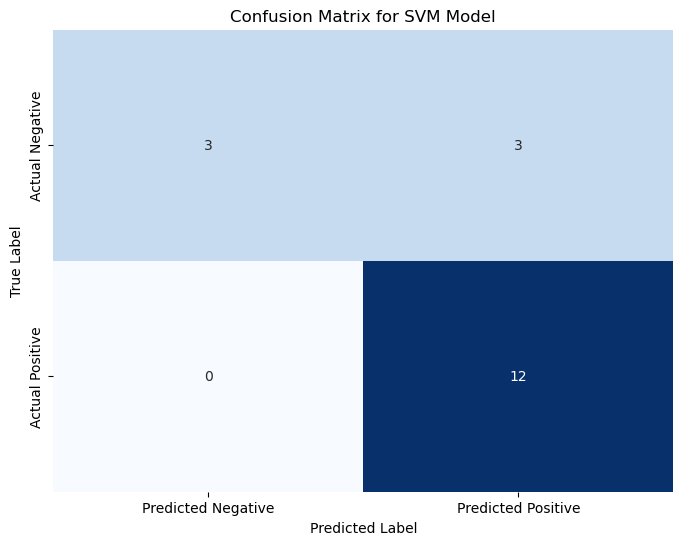

In [219]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, yhat_best_svm)

# Confusion Matrix for best SVM model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Model')
plt.savefig('Capstone/Lab 8/confusion_matrix.png')
plt.show()

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
